# **Efectos de la atmósfera terrestre sobre la radiación que llega del espacio**

## Resumen

Cuando observamos una fuente astronómica con un telescopio en la Tierra, la atmósfera afecta la radiación que recibimos. Existen maneras de caracterizar este efecto. En esta práctica aprenderemos uno de ellos. Recuerden leer la bibliografía accesible desde la Wiki de la materia (Wiki:Unidad 3).


#### Ejercicio 1. Describa los siguientes efectos producidos por la Atmósfera Terrestre (AT) sobre la radiación estelar:
#### a) Absorción
#### b) Dispersión
#### c) Emisión
#### d) Turbulencia

#### De valores típicos de seeing, en al menos tres observatorios distintos.

#### Ejercicio 2. Defina profundidad óptica.

#### Ejercicio 3. Deduzca la Ley de Bouguer:

 Suponga una atmósfera de capas plano paralelas, isoterma y en equilibrio hidrostático, para llegar a:
 
 m = m0 + κ X,
 
 dónde κ es el coeficiente de extinción monocromatico y X es la masa de aire.
 
#### Ejercicio 4. Idee una forma observacional de verificar la validez de esta ley.

#### Ejercicio 5.  Verifique la ley de Bouguer. 

Para ello mida las magnitudes instrumentales en un conjunto de imágenes obtenidas en el Complejo Astronómico El Leoncito, San Juan, en noviembre de 2015. Determine la pendiente de la ecuación de la Ley de Bouguer para cada uno de los filtros BVI.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#from astropy.visualization import ImageNormalize, ZScaleInterval, LinearStretch

In [2]:
ls   # podemos ver qué archivos tenemos en el directorio, igual que con linux:

activarJupyter*          HR_plt.ipynb         tphe_r01s.fits
curva_crecimiento.ipynb  n3294.fits           tphe_r02s.fits
espectro01.fits          Nstars_V3.csv        tphe_r03s.fits
espectro02.fits          SahaBoltzmann.ipynb  tphe_u01s.fits
espectro03.fits          tp0.ipynb            tphe_u02s.fits
espectro04.fits          tp1.ipynb            tphe_u03s.fits
espectro05.fits          tp3.ipynb            tphe_v01s.fits
espectro06.fits          tphe_b01s.fits       tphe_v02s.fits
espectro07.fits          tphe_b02s.fits       tphe_v03s.fits
espectro08.fits          tphe_b03s.fits       V0001.fits
espectro09.fits          tphe_i01s.fits       V0001w.fits
espectro10.fits          tphe_i02s.fits       VerEspectrosInteract.ipynb
HD5980.fits              tphe_i03s.fits       Verfits.ipynb


In [3]:
#  Despliegue una de las imágenes en el DS9. 
# Identifique las estrellas estándares del campo de T Phoenicis (TPHE). 
# Comparando con las indicadas en el trabajo de Landolt (1992).
#
imagen = 'tphe_v01s.fits'
with fits.open(imagen) as hdul:
    hdul.info()
    hdr = hdul[0].header  # defino hdr como la variable con el contenido del header
    data = hdul[0].data   # defino data con el contenido de la imagen

Filename: tphe_v01s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (409, 411)   float32   


In [4]:
hdr  # para "ver" una variable simplemente tipeo su nombre

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  409 / Axis length                                    
NAXIS2  =                  411 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-08-30T14:18:20' / Date FITS file was generated                  
IRAF-TLM= '2017-03-08T19:38:43' / Time of last modification                     
OBJECT  = 'TPHE    '           / Name of the object observed                    
CCDSIZE = '[1:2048,1:2058] '     / CCD size                                     
CCDSUM  = '5 5 '                 / CCD binning factors                          
PIXSIZE1=                 13

In [5]:
# Determino variables estadísticas de la imagen:
data_min = data.min()
data_max = data.max()
data_mean = data.mean()
data_std = data.std()
print(data_min, data_max, data_mean, data_std)

0.0 55449.273 136.52036 384.5497


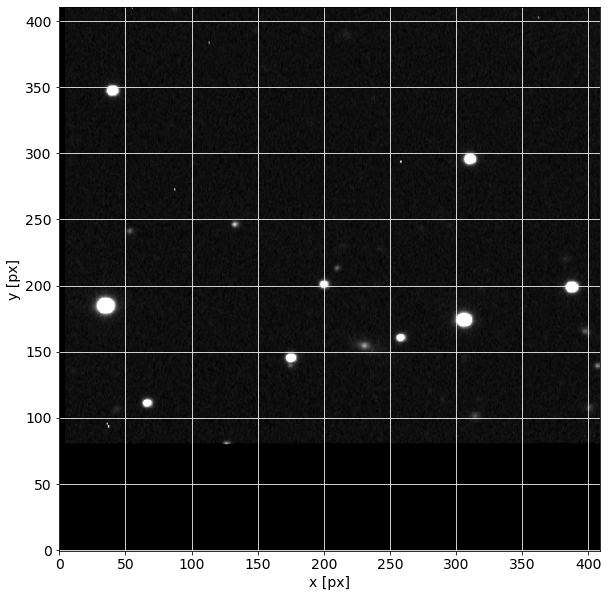

In [6]:
# vuelvo a plotear, pero ahora le indico entre qué valores z1 (=vmin) y z2 (=vmax) quiero "ver"
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data, origin='lower',  vmin=data_mean-0*data_std, vmax=data_mean+1*data_std, cmap='gray')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
#plt.colorbar(img)
ax.grid(color='white', ls='solid')
plt.show()

Hay que identificar las estrellas que queremos medir.

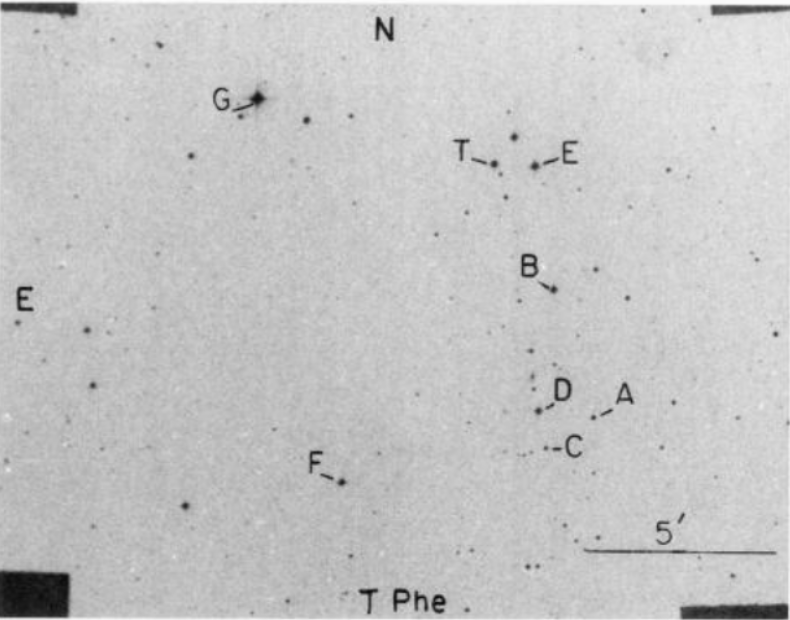

In [7]:
import imexam
import os
os.environ['XPA_METHOD'] = "local" # para conectarlo a ds9
a = imexam.connect()
a.load_fits('tphe_v01s.fits')
a.scale()

Ginga not installed, use other viewer, or no viewer



Press 'q' to quit

2 Make the next plot in a new window
a Aperture sum, with radius region_size 
b Return the 2D gauss fit center of the object
c Return column plot
d Return the Center of Mass fit center of the object
e Return a contour plot in a region around the cursor
g Return curve of growth plot
h Return a histogram in the region around the cursor
j 1D [Gaussian1D default] line fit 
k 1D [Gaussian1D default] column fit
l Return line plot
m Square region stats, in [region_size],default is median
r Return the radial profile plot
s Save current figure to disk as [plot_name]
t Make a fits image cutout using pointer location
w Display a surface plot around the cursor location
x Return x,y,value of pixel
y Return x,y,value of pixel
Current image /home/rgamen/notebooks/tphe_v01s.fits
xc=309.7013	yc=295.7437
x              y              radius         flux           mag(zpt=2.5e+01)              sky/pix        fwhm(x,y)
310.00         297.00         5              8.9e+04        1.3e+01

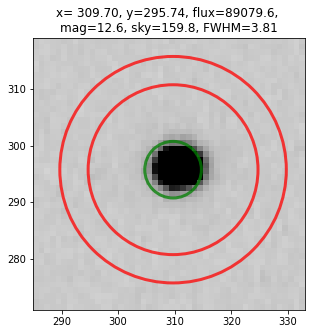

xc=34.3503	yc=184.8705
x              y              radius         flux           mag(zpt=2.5e+01)              sky/pix        fwhm(x,y)
36.00          183.00         5              7.6e+05        1e+01          163.462        1.59,1.38
34.35032984765851 184.87050542305678 24.0


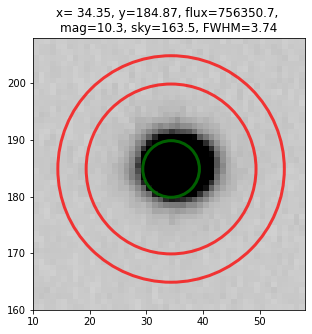

xc=386.7565	yc=198.9808
x              y              radius         flux           mag(zpt=2.5e+01)              sky/pix        fwhm(x,y)
389.00         199.00         5              1.1e+05        1.2e+01        160.520        1.62,1.40
386.75653691329654 198.98078625704542 24.0


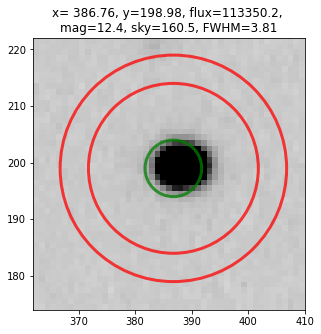

xc=305.2930	yc=174.2365
x              y              radius         flux           mag(zpt=2.5e+01)              sky/pix        fwhm(x,y)
305.00         175.00         5              3.8e+05        1.1e+01        160.897        1.61,1.38
305.29300241530433 174.23647073616831 24.0


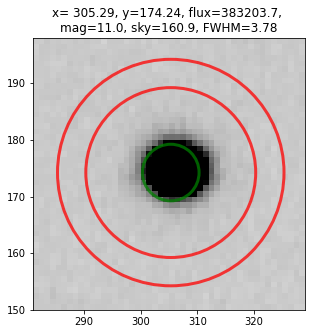

In [8]:
# Analizo una de las imágenes con imexam
# Identifico las estrellas que quiero medir (tecla "a") para obtener sus coordenadas.
#
a.imexam()

Los fotones provenientes una estrella presentan una distribución espacial sobre el CCD. No forman un punto. La "forma" de esta distribución se llama PSF (por sus siglas en Inglés "Point Spread Function"). 

Para contar todos los fotones provenientes de la estrella debo estudiar lo que se denomina curva de crecimiento. Implica contar los fotones para distintas aperturas a partir del centro. Debo notar que a una cierta distancia del centro de la estrella el flujo se estabiliza. No hay más fotones de la fuente. Es decir, que más allá de dicho radio los fotones que cuento son los del llamado "cielo" o "fondo".

In [9]:
# https://imexam.readthedocs.io/en/latest/imexam/imexam_command.html
# imexam tiene esa herramienta. Para verlo bien vamos a definir un "radio" bien grande:
a.gimexam()

{'function': ['curve_of_growth'],
 'title': [None, 'Title of the plot'],
 'xlabel': ['radius', 'The string for the xaxis label'],
 'ylabel': ['Encircled Flux', 'The string for the yaxis label'],
 'center': [True, 'Fit for center? [bool]'],
 'background': [True, 'Fit and subtract background? [bool]'],
 'buffer': [25.0, 'Background inner radius in pixels,from center of star'],
 'width': [5.0, 'Background annulus width in pixels'],
 'magzero': [25.0, 'magnitude zero point'],
 'rplot': [8.0, 'Plotting radius in pixels'],
 'pointmode': [True, 'plot points instead of lines? [bool]'],
 'marker': ['o', 'The marker character to use, matplotlib style'],
 'logx': [False, 'log scale x-axis?'],
 'logy': [False, 'log scale y-axis?'],
 'minflux': [0.0, 'only measure flux above this value'],
 'getdata': [True, 'return the plotted data values']}

set curve_of_growth_pars: rplot to 25

Press 'q' to quit

2 Make the next plot in a new window
a Aperture sum, with radius region_size 
b Return the 2D gauss fit center of the object
c Return column plot
d Return the Center of Mass fit center of the object
e Return a contour plot in a region around the cursor
g Return curve of growth plot
h Return a histogram in the region around the cursor
j 1D [Gaussian1D default] line fit 
k 1D [Gaussian1D default] column fit
l Return line plot
m Square region stats, in [region_size],default is median
r Return the radial profile plot
s Save current figure to disk as [plot_name]
t Make a fits image cutout using pointer location
w Display a surface plot around the cursor location
x Return x,y,value of pixel
y Return x,y,value of pixel
Current image /home/rgamen/notebooks/tphe_v01s.fits
xc=305.2930	yc=174.2365

at (x,y)=305,174
radii:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
flux:[27303.537403617727, 170962.008989470

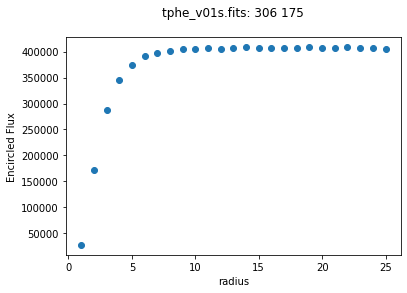

In [10]:
a.set_plot_pars('g',"rplot",25)  #seteo el radio más grande para notar el efecto
#
a.imexam()

Puedo comprobar que la curva se estabiliza en 10 pixeles. Por lo que si quiero contar todos los fotones provenientes de la estrella debo definir una zona con dicho radio. Pero dentro de dicho radio inciden, además de los fotones provenientes de la estrella, fotones del "cielo". Debo restarlos. Para ello, considero una región externa "a la PSF de la estrella" y determino el flujo del cielo. Entonces, para hacer la fotometría debo definir una apertura y un anillo. 

In [11]:
# Para saber cuáles parámetros debo definir
a.aimexam()

{'function': ['aper_phot'],
 'center': [True, 'Center the object (choose center_type)'],
 'center_com': [False, 'gaussian2d, True=center of mass'],
 'width': [5, 'Width of sky annulus in pixels'],
 'subsky': [True, 'Subtract a sky background?'],
 'skyrad': [15, 'Distance to start sky annulus is pixels'],
 'radius': [5, 'Radius of aperture for star flux'],
 'zmag': [25.0, 'zeropoint for the magnitude calculation'],
 'title': [None, 'Title of the plot'],
 'scale': ['zscale', 'How to scale the image'],
 'color_min': [None, 'Minimum color value'],
 'color_max': [None, 'Maximum color value'],
 'cmap': ['Greys', 'Matplotlib colormap to use'],
 'delta': [10, 'bounding box for centering measurement']}

set aper_phot_pars: radius to 12
set aper_phot_pars: skyrad to 13
set aper_phot_pars: width to 5

Press 'q' to quit

2 Make the next plot in a new window
a Aperture sum, with radius region_size 
b Return the 2D gauss fit center of the object
c Return column plot
d Return the Center of Mass fit center of the object
e Return a contour plot in a region around the cursor
g Return curve of growth plot
h Return a histogram in the region around the cursor
j 1D [Gaussian1D default] line fit 
k 1D [Gaussian1D default] column fit
l Return line plot
m Square region stats, in [region_size],default is median
r Return the radial profile plot
s Save current figure to disk as [plot_name]
t Make a fits image cutout using pointer location
w Display a surface plot around the cursor location
x Return x,y,value of pixel
y Return x,y,value of pixel
Current image /home/rgamen/notebooks/tphe_v01s.fits
xc=305.2930	yc=174.2365
x              y              radius         flux           mag(zpt=2.5e+01)         

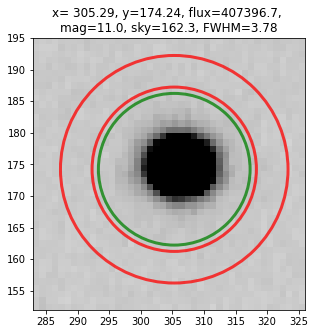

In [12]:
a.set_plot_pars('a',"radius",12)  #seteo apertura
a.set_plot_pars('a',"skyrad",13)  #seteo radio interno del anillo
a.set_plot_pars('a',"width",5)  #seteo ancho del anillo
#
a.imexam()

### Usando PHOT UTILS para medir muchas estrellas (e imágenes) a la vez (de forma controlada)

 id xcenter  ycenter    aperture_sum_0     aperture_sum_1 
      pix      pix                                        
--- -------- -------- ------------------ -----------------
  1 309.9848 295.7264 167245.02664117457 78077.97124500464
  2  34.6998 185.0906  879882.4681819793 80686.79713019356
  3 387.2376 199.1036 194090.54869103798 78164.92473936168
  4 305.7601 174.5279 480911.56917244825 78982.29728296447


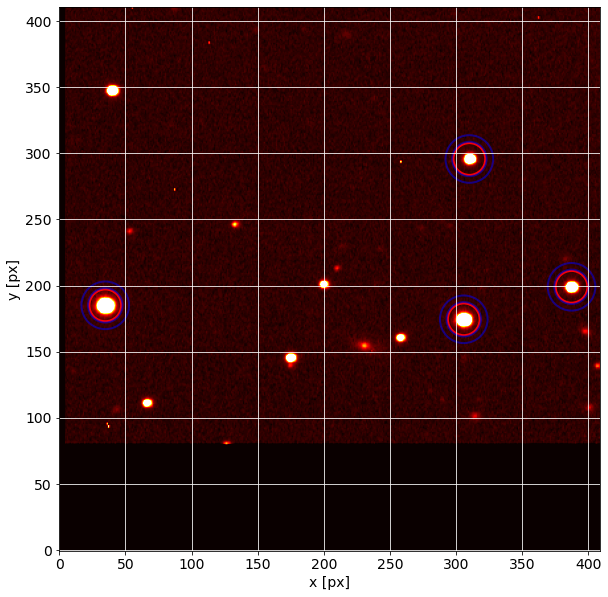

In [36]:
from astropy.io import fits
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
import numpy as np
import pandas as pd
#
imagen = 'tphe_v01s.fits'
with fits.open(imagen) as hdul:
    hdr = hdul[0].header  # defino hdr como la variable con el contenido del header
    data = hdul[0].data   # defino data con el contenido de la imagen
#
positions = [(309.9848, 295.7264), (34.6998, 185.0906), (387.2376, 199.1036), (305.7601, 174.5279)]
aperture = CircularAperture(positions, r=12.)
anncielo = CircularAnnulus(positions, r_in=13, r_out=18) # positions, r_in, r_out
apers = [aperture, anncielo]
phot_table = aperture_photometry(data, apers)
#for col in phot_table.colnames:
#    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)
#
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data, origin='lower', vmin=data.mean()-0*data.std(), vmax=data.mean()+1*data.std(), cmap='hot')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
aperture.plot(color='red', lw=2)
anncielo.plot(color='blue', lw=2, alpha=0.5)
#plt.colorbar(img)
ax.grid(color='white', ls='solid')
plt.show()

In [60]:
bkg_mean = phot_table['aperture_sum_1'] / anncielo.area # ADUs por pixel en el cielo
bkg_sum = bkg_mean * aperture.area                      # ADUs totales del cielo dentro de la apertura de la estrella
final_sum = phot_table['aperture_sum_0'] - bkg_sum      # ADUs provenientes de la estrella
phot_table['flux corrected'] = final_sum
phot_table['magnitud'] = -2.5 * np.log10(final_sum/hdr['EXPTIME'])+25 # Normalizo al tiempo de exposición
phot_table['airmass'] = hdr['AIRMASS']
#
print(phot_table) #['id','xcenter','ycenter','magnitud'])

 id xcenter  ycenter  ...   flux corrected        magnitud      airmass
      pix      pix    ...                                              
--- -------- -------- ... ------------------ ------------------ -------
  1 309.9848 295.7264 ... 162886.92278965423    16.415662578912    1.76
  2  34.6998 185.0906 ... 1370179.9281083865 14.103434122933587    1.76
  3 387.2376 199.1036 ...  212813.4678706634 16.125380354062873    1.76
  4 305.7601 174.5279 ...  703947.1936124675 14.826527921224812    1.76


Ahora que entendemos qué es la fotometría de apertura, podemos continuar midiendo las 3 imágenes de cada filtro. Para ello, vamos a correr el siguiente código para cada imagen, simplemente cambiando el nombre de la imagen. 

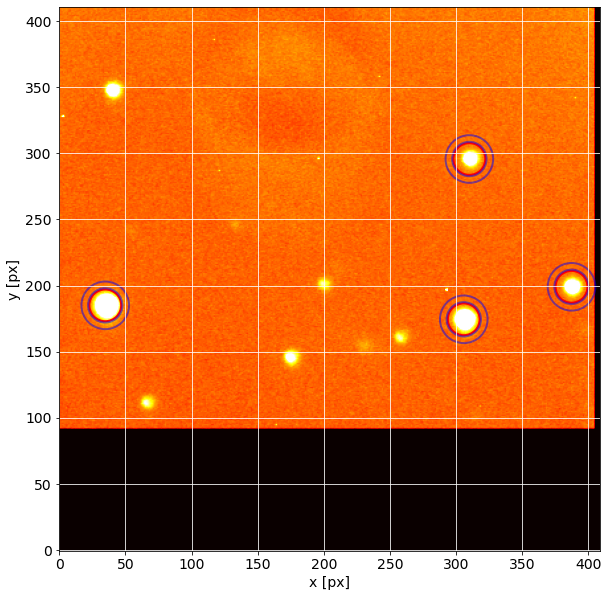

   id   magnitud  airmass
0   1  16.415663     1.76
1   2  14.103434     1.76
2   3  16.125380     1.76
3   4  14.826528     1.76


In [66]:
from astropy.io import fits
from photutils import CircularAperture, CircularAnnulus
from photutils import aperture_photometry
from astropy.stats import sigma_clipped_stats
import numpy as np
import pandas as pd
#
imagen = 'tphe_v03s.fits'
with fits.open(imagen) as hdul:
    hdr = hdul[0].header  # defino hdr como la variable con el contenido del header
    data = hdul[0].data   # defino data con el contenido de la imagen
#
positions = [(309.9848, 295.7264), (34.6998, 185.0906), (387.2376, 199.1036), (305.7601, 174.5279)]
aperture = CircularAperture(positions, r=12.)
anncielo = CircularAnnulus(positions, r_in=13, r_out=18) # positions, r_in, r_out
apers = [aperture, anncielo]
phot_table = aperture_photometry(data, apers)
bkg_mean = phot_table['aperture_sum_1'] / anncielo.area # ADUs por pixel en el cielo
bkg_sum = bkg_mean * aperture.area                      # ADUs totales del cielo dentro de la apertura de la estrella
final_sum = phot_table['aperture_sum_0'] - bkg_sum      # ADUs provenientes de la estrella
phot_table['flux corrected'] = final_sum
phot_table['magnitud'] = -2.5 * np.log10(final_sum/hdr['EXPTIME'])+25
phot_table['airmass'] = hdr['AIRMASS']
#
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data, origin='lower', vmin=data.mean()-0*data.std(), vmax=data.mean()+1*data.std(), cmap='hot')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
aperture.plot(color='red', lw=2)
anncielo.plot(color='blue', lw=2, alpha=0.5)
#plt.colorbar(img)
ax.grid(color='white', ls='solid')
plt.show()
tabla = pd.DataFrame()
tabla['id'] = phot_table['id']
tabla['magnitud'] = phot_table['magnitud']
tabla['airmass'] = phot_table['airmass']
print (tabla)

Cada vez que corramos el código anterior con una imagen distinta, los resultados se reescriben en la "tablaX", entonces para guardarlos, corremos el código correspondiente (entre los de abajo):

In [63]:
tabla1 = pd.DataFrame()
tabla1 = pd.DataFrame(tabla.values.reshape(1, -1)) #toda la fotometría queda en una sola línea

In [65]:
tabla2 = pd.DataFrame()
tabla2 = pd.DataFrame(tabla.values.reshape(1, -1)) #toda la fotometría queda en una sola línea

In [67]:
tabla3 = pd.DataFrame()
tabla3 = pd.DataFrame(tabla.values.reshape(1, -1)) #toda la fotometría queda en una sola línea

Tengo 3 tablas con toda la fotometría. Las voy a juntar en una sola para poder hacer gráficos.

In [68]:
tabla1.columns = ['id1','mag1','air1','id2','mag2','air2','id3','mag3','air3','id4','mag4','air4']
tabla2.columns = ['id1','mag1','air1','id2','mag2','air2','id3','mag3','air3','id4','mag4','air4']
tabla3.columns = ['id1','mag1','air1','id2','mag2','air2','id3','mag3','air3','id4','mag4','air4']
print (tabla1,tabla2,tabla3)

   id1       mag1  air1  id2       mag2  air2  id3       mag3  air3  id4  \
0  1.0  16.251836  1.04  2.0  13.928419  1.04  3.0  15.981605  1.04  4.0   

        mag4  air4  
0  14.667392  1.04      id1       mag1  air1  id2       mag2  air2  id3       mag3  air3  id4  \
0  1.0  16.284815  1.14  2.0  13.970753  1.14  3.0  16.012202  1.14  4.0   

        mag4  air4  
0  14.703405  1.14      id1       mag1  air1  id2       mag2  air2  id3      mag3  air3  id4  \
0  1.0  16.415663  1.76  2.0  14.103434  1.76  3.0  16.12538  1.76  4.0   

        mag4  air4  
0  14.826528  1.76  


In [69]:
datos = pd.DataFrame()
datos = tabla1.append(tabla2, ignore_index=True).append(tabla3, ignore_index=True)
print (datos)

   id1       mag1  air1  id2       mag2  air2  id3       mag3  air3  id4  \
0  1.0  16.251836  1.04  2.0  13.928419  1.04  3.0  15.981605  1.04  4.0   
1  1.0  16.284815  1.14  2.0  13.970753  1.14  3.0  16.012202  1.14  4.0   
2  1.0  16.415663  1.76  2.0  14.103434  1.76  3.0  16.125380  1.76  4.0   

        mag4  air4  
0  14.667392  1.04  
1  14.703405  1.14  
2  14.826528  1.76  


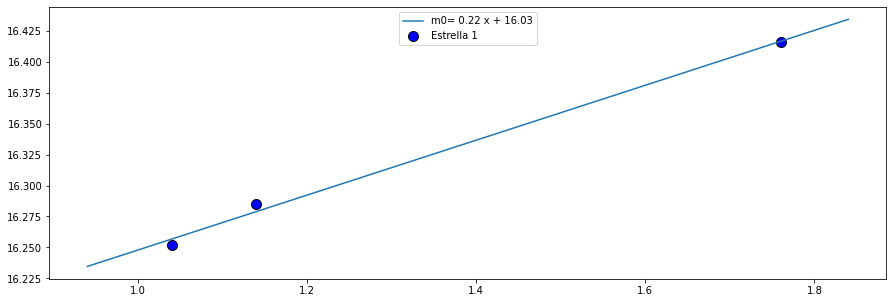

In [74]:
import matplotlib.pyplot as plt
import numpy as np
#
plt.rcParams['figure.figsize'] = [15, 5]
plt.scatter(data=datos, x='air1', y='mag1',alpha=1, edgecolors='black', c='blue', s=100, label='Estrella 1')
#
# Ajusto polinomio de grado 1  
z = np.polyfit(x=datos['air1'], y=datos['mag1'], deg=1)
p = np.poly1d(z)
# Calculo polinomio con el ajuste y grafico
x = np.arange(datos['air1'].min()-0.1,datos['air1'].max()+0.1,0.1)
y = x * z[0] + z[1]
plt.plot(x, y, label='m0= %.2f x + %.2f' %(z[0],z[1]))
#
plt.legend(loc='upper center')
plt.show()

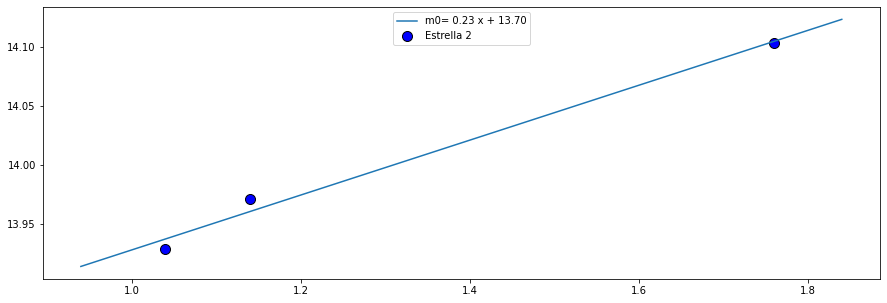

In [76]:
import matplotlib.pyplot as plt
import numpy as np
#
plt.rcParams['figure.figsize'] = [15, 5]
plt.scatter(data=datos, x='air1', y='mag2',alpha=1, edgecolors='black', c='blue', s=100, label='Estrella 2')
#
# Ajusto polinomio de grado 1  
z = np.polyfit(x=datos['air1'], y=datos['mag2'], deg=1)
p = np.poly1d(z)
# Calculo polinomio con el ajuste y grafico
x = np.arange(datos['air1'].min()-0.1,datos['air1'].max()+0.1,0.1)
y = x * z[0] + z[1]
plt.plot(x, y, label='m0= %.2f x + %.2f' %(z[0],z[1]))
#
plt.legend(loc='upper center')
plt.show()